In [1]:
import pandas as pd
import numpy as np

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

Packages for Mathematical Computation and visualization imported!


In [2]:
df1 = pd.read_csv("datasets\cleanedbasic\leeds20-21.csv")
df2 = pd.read_csv("datasets\cleanedbasic\leeds21-22.csv")

In [3]:
df1.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Per90G+A-PK,xG,npxG,xA,npxG+xAG,Per90xG,Per90xA,Per90xG+xA,Per90npxG,Per90npxG+xAG
0,Stuart Dallas,nir NIR,DFMF,29,38,38,3409,37.9,8,2,...,0.26,4.6,4.6,2.1,6.7,0.12,0.05,0.18,0.12,0.18
1,Luke Ayling,eng ENG,DF,28,38,38,3399,37.8,0,0,...,0.00,1.4,1.4,2.6,4.0,0.04,0.07,0.10,0.04,0.10
2,Patrick Bamford,eng ENG,FW,26,38,37,3050,33.9,17,7,...,0.65,17.3,15.7,4.1,19.8,0.51,0.12,0.63,0.46,0.59
3,Illan Meslier,fr FRA,GK,20,35,35,3150,35.0,0,0,...,0.00,0.0,0.0,0.1,0.1,0.00,0.00,0.00,0.00,0.00
4,Jack Harrison,eng ENG,MF,23,36,34,2847,31.6,8,8,...,0.51,6.6,6.6,7.1,13.7,0.21,0.22,0.43,0.21,0.43


In [4]:
df1.shape

(23, 29)

In [5]:
df2.shape

(29, 29)

In [6]:
df1 = df1[df1['Min'] > 0]
df2 = df2[df2['Min'] > 0]

In [7]:
df1.dtypes

Player            object
Nation            object
Pos               object
Age                int64
MP                 int64
Starts             int64
Min                int64
90s              float64
Gls                int64
Ast                int64
G-PK               int64
PK                 int64
PKatt              int64
CrdY               int64
CrdR               int64
Per90Gls         float64
Per90Ast         float64
Per90G+A         float64
Per90G-PK        float64
Per90G+A-PK      float64
xG               float64
npxG             float64
xA               float64
npxG+xAG         float64
Per90xG          float64
Per90xA          float64
Per90xG+xA       float64
Per90npxG        float64
Per90npxG+xAG    float64
dtype: object

### Leeds United First Season VS Second Season Comparison

Leeds United fell firmly into the category of "second season syndrome" by achieving 59 points and a 9th place finish in their first season but only finishing 17th the following season, narrowly avoiding relegation. Firstly, we will look into some factors surrounding their squad such as player turnover between the two seasons, performance levels between the two seasons and more.

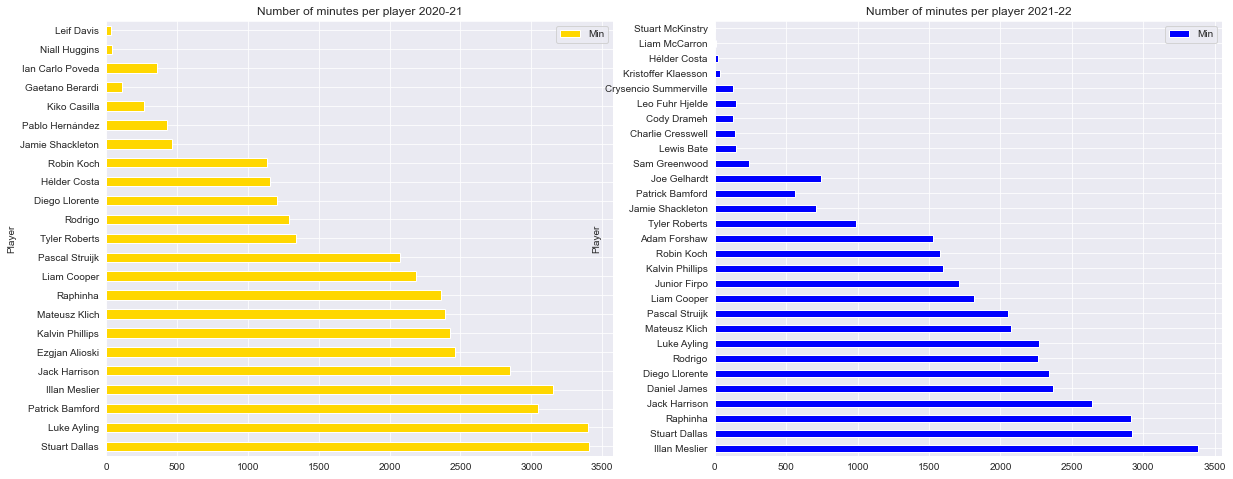

In [8]:
# first let's investigate squad turnover
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df1.plot.barh(x = 'Player', y = 'Min', ax= ax1, title='Number of minutes per player 2020-21',
             color='gold')
df2.plot.barh(x = 'Player', y = 'Min', ax= ax2, title='Number of minutes per player 2021-22',
             color='blue')
plt.show()

In [9]:
print("The number of players in Leeds United's 2020-21 squad was: " + str(len(df1.index)))
print("The number of players in Leeds United's 2021-22 squad was: " + str(len(df2.index)))

The number of players in Leeds United's 2020-21 squad was: 23
The number of players in Leeds United's 2021-22 squad was: 29


In [10]:
print("Mean minutes played in Leeds United's 2020-21 squad was: " + str(df1['Min'].mean()))
print("Mean minutes played in Leeds United's 2021-22 squad was: " + str(df2['Min'].mean()))

Mean minutes played in Leeds United's 2020-21 squad was: 1633.6521739130435
Mean minutes played in Leeds United's 2021-22 squad was: 1291.655172413793


We can see that there was certainly a higher turnover of players in Leeds' second season here. 6 more players were used and there appears to be a far larger spread of the minutes. There was 4 players who played over 3000 minutes in their first season but only 1 in their second season (Illan Meslier who is a keeper which would be expected from a goalkeeper). The mean number of minutes played also further illustrates this point. There is approximately 350 minutes of a difference in mean gametime of players (nearly 4 matches worth) which points towards injuries and/or loss of form to previously important players.

##### Let's look at performance metrics now. Firstly, we will focus on expected goals

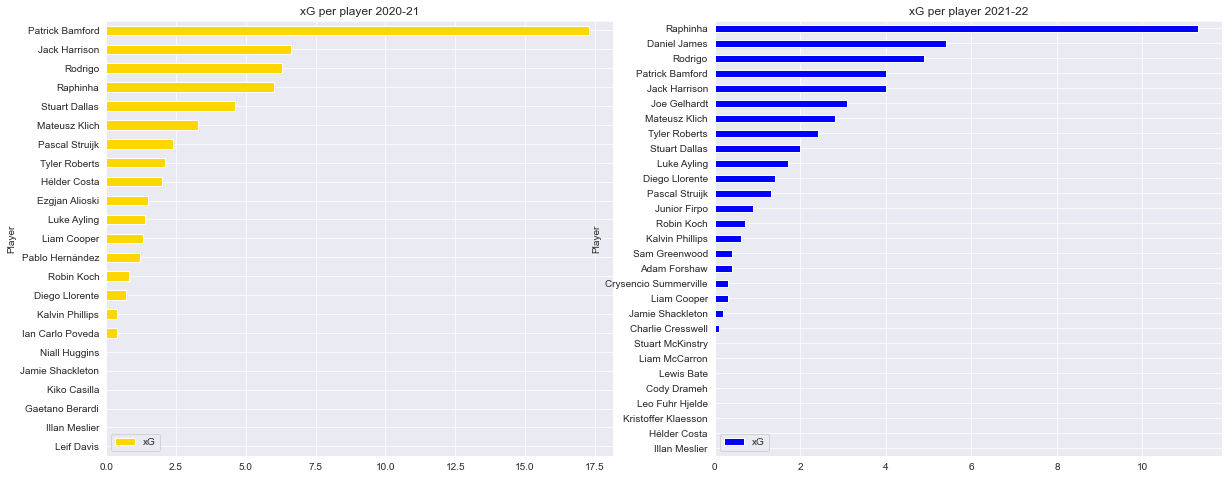

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('xG')
df_c2 = df2.sort_values('xG')
df_c1.plot.barh(x = 'Player', y = 'xG', ax= ax1, title='xG per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'xG', ax= ax2, title='xG per player 2021-22',
             color='blue')
plt.show()

In [12]:
print("Team xG in Leeds United's 2020-21 squad was: " + str(sum(df1['xG'])))
print("Team xG in Leeds United's 2021-22 squad was: " + str(sum(df2['xG'])))

Team xG in Leeds United's 2020-21 squad was: 58.29999999999999
Team xG in Leeds United's 2021-22 squad was: 48.199999999999996


Let's investigate further. There is quite a large dropoff here from one season to the next in terms of xG which suggests Leeds United struggled to create chances more in their second season. Let's take "non-penalty xG" here. Penalties are a very high probability chance (roughly 0.8 likelihood of scoring) so removing these will give us a better indication of open play.

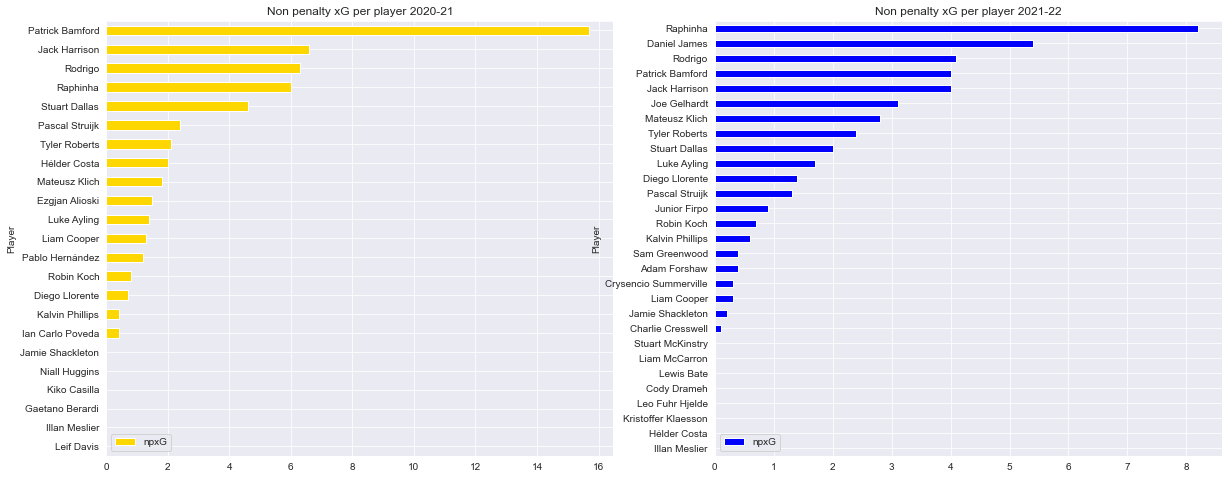

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('npxG')
df_c2 = df2.sort_values('npxG')
df_c1.plot.barh(x = 'Player', y = 'npxG', ax= ax1, title='Non penalty xG per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'npxG', ax= ax2, title='Non penalty xG per player 2021-22',
             color='blue')
plt.show()

In [14]:
print("Team xG in Leeds United's 2020-21 squad was: " + str(sum(df1['npxG'])))
print("Team xG in Leeds United's 2021-22 squad was: " + str(sum(df2['npxG'])))

Team xG in Leeds United's 2020-21 squad was: 55.199999999999996
Team xG in Leeds United's 2021-22 squad was: 44.300000000000004


#### xG VS Actual Difference

In [15]:
df1['Actual - xG'] = df1['Gls'] - df1['xG']
df2['Actual - xG'] = df2['Gls'] - df2['xG']

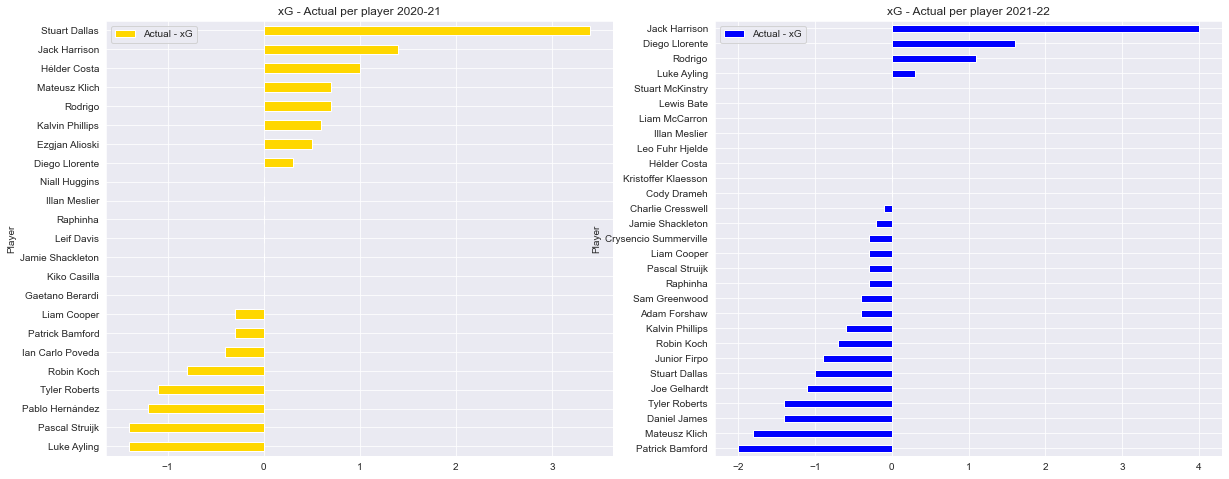

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Actual - xG')
df_c2 = df2.sort_values('Actual - xG')
df_c1.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax1, title='xG - Actual per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xG', ax= ax2, title='xG - Actual per player 2021-22',
             color='blue')
plt.show()

We can see that a significant number of players underperformed their xG data in Leeds' second season when compared to their first, where the majority met expected goals or overachieved their xG. It is interesting to note that Leeds' top scorer in their first season Patrick Bamford underperformed in the second season despite the limited number of minutes he had in 2021-22. It also must be noted in the first season most of Leeds' "underperformers" (those who had a negative value in these top plots, were either defenders or had a limited amount of minutes. Most players playing regularly hit their expected number of goals which helped enable Leeds to enjoy a strong first season. The opposite is true in their second season where regular players did underperform their expected goals tallies and may be part of the reason why they fell foul of the "second season syndrome". 

### Let's now investigate Assists and expected assists (xA). This will allow us to see did Leeds United create high quality chances and if this was potentially a factor in their drop off across the two seasons.

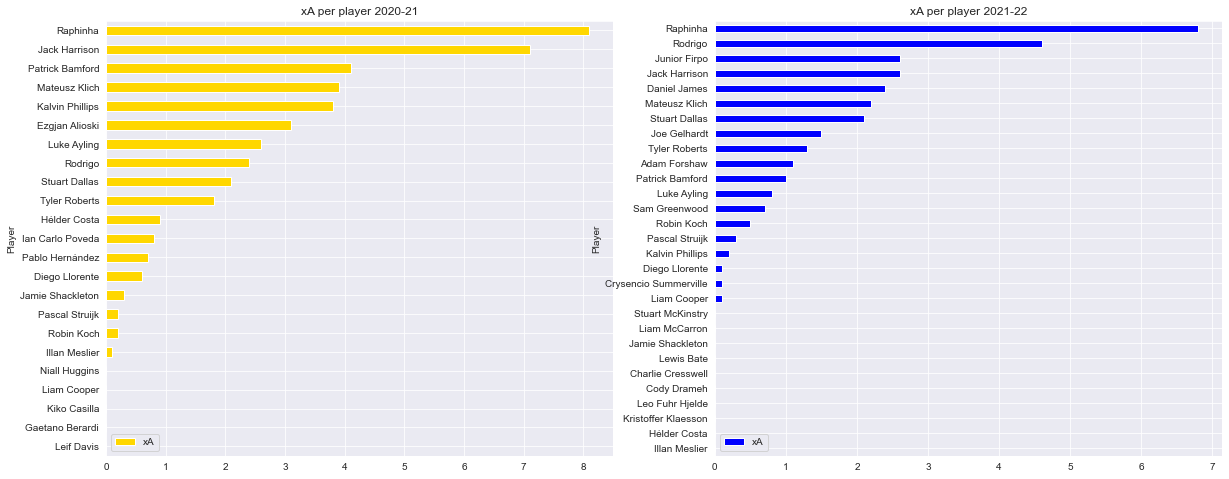

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('xA')
df_c2 = df2.sort_values('xA')
df_c1.plot.barh(x = 'Player', y = 'xA', ax= ax1, title='xA per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'xA', ax= ax2, title='xA per player 2021-22',
             color='blue')
plt.show()

In [18]:
print("Team xA in Leeds United's 2020-21 squad was: " + str(sum(df1['xA'])))
print("Team xA in Leeds United's 2021-22 squad was: " + str(sum(df2['xA'])))

Team xA in Leeds United's 2020-21 squad was: 42.8
Team xA in Leeds United's 2021-22 squad was: 31.000000000000007


#### xA VS Actual Assists

In [19]:
df1['Actual - xA'] = df1['Ast'] - df1['xA']
df2['Actual - xA'] = df2['Ast'] - df2['xA']

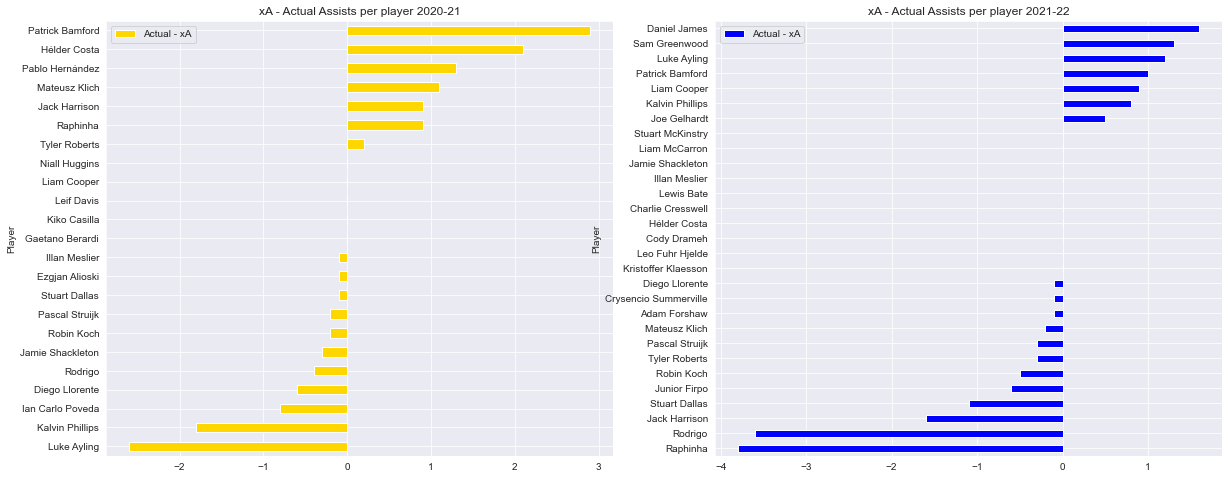

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Actual - xA')
df_c2 = df2.sort_values('Actual - xA')
df_c1.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax1, title='xA - Actual Assists per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Actual - xA', ax= ax2, title='xA - Actual Assists per player 2021-22',
             color='blue')
plt.show()

In [21]:
print("Team actual minus xA in Leeds United's 2020-21 squad was: " + str(sum(df1['Actual - xA'])))
print("Team actual minus xA in Leeds United's 2021-22 squad was: " + str(sum(df2['Actual - xA'])))

Team actual minus xA in Leeds United's 2020-21 squad was: 2.200000000000001
Team actual minus xA in Leeds United's 2021-22 squad was: -5.0


In terms of the number of players in the squads for both seasons, there isn't a big difference in the number of players underperforming/overperforming their numbers. However, if we look at season two the three players who have seen the biggest underperformance in terms of assists (Raphinha, Rodrigo and Jack Harrison) they have a large underperformance in the number of assists they would commonly be expected to get given the areas they are creating chances from. This would feed in our earlier analysis of Leeds' second season showing they underperformed the number of goals they should have been expected to score. This is most likely due to the lack of a reliable goal scorer. If we look at some of our earlier findings we see that Leeds had a regular goalscorer in Patrick Bamford who met his high xG levels and played regularly. There was no forward in the data for 2021-22 that showed similar characteristics which suggests the lack of a reliable striker led to Leeds suffering the dreaded "second season syndrome".

### Per 90 comparisons

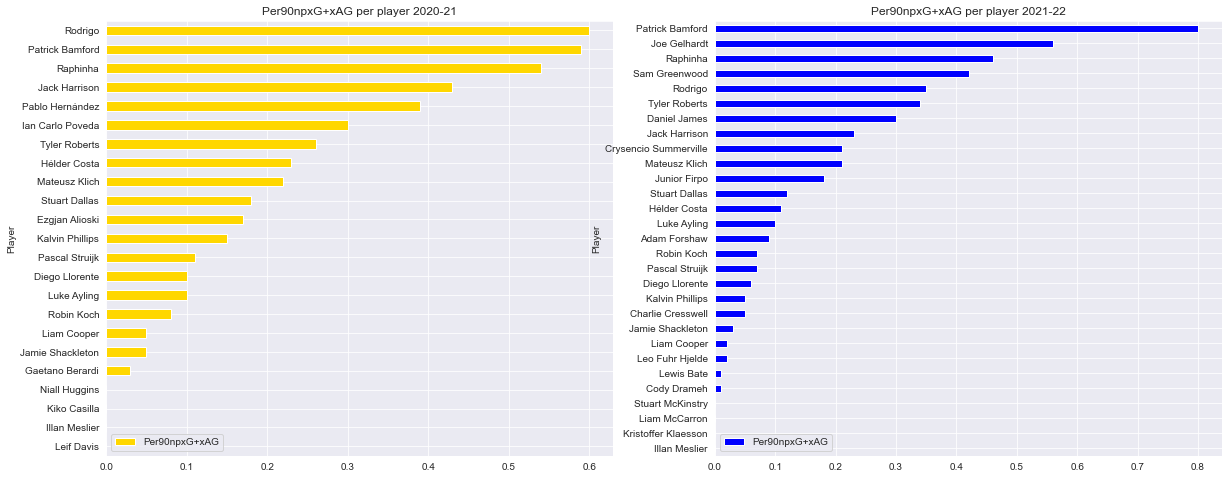

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
df_c1 = df1.sort_values('Per90npxG+xAG')
df_c2 = df2.sort_values('Per90npxG+xAG')
df_c1.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax1, title='Per90npxG+xAG per player 2020-21',
             color='gold')
df_c2.plot.barh(x = 'Player', y = 'Per90npxG+xAG', ax= ax2, title='Per90npxG+xAG per player 2021-22',
             color='blue')
plt.show()

### Let's now compare players who played in both seasons for Leeds
By doing this, it allows us to better understand if for example a significant turnover of players or a loss of form from previously key players led to their "second season syndrome". We will focus on minutes played and per 90 metrics here.

In [23]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Per90npxG+xAG"].item()
        # subtract 2021/22 data from 2020/21 for players who played both seasons
        ## if result of this subtraction is negative then the player performance has regressed
        vals = val - df1.loc[df1['Player'] == players1[i], "Per90npxG+xAG"].item()
        d[players1[i]] = vals
    else:
        continue

In [24]:
d

{'Stuart Dallas': -0.06,
 'Luke Ayling': 0.0,
 'Patrick Bamford': 0.21000000000000008,
 'Illan Meslier': 0.0,
 'Jack Harrison': -0.19999999999999998,
 'Kalvin Phillips': -0.09999999999999999,
 'Mateusz Klich': -0.010000000000000009,
 'Raphinha': -0.08000000000000002,
 'Liam Cooper': -0.030000000000000002,
 'Pascal Struijk': -0.039999999999999994,
 'Tyler Roberts': 0.08000000000000002,
 'Rodrigo': -0.25,
 'Diego Llorente': -0.04000000000000001,
 'Hélder Costa': -0.12000000000000001,
 'Robin Koch': -0.009999999999999995,
 'Jamie Shackleton': -0.020000000000000004}

In [25]:
per90commonplayers = pd.DataFrame.from_dict(d, orient='index')

In [26]:
per90commonplayers = per90commonplayers.reset_index()
per90commonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceXGXA'}, inplace = True)

In [27]:
players1 = list(df1['Player'])
players2 = list(df2['Player'])
d1 = {}
for i in range(len(players1)):
    if players1[i] in players2:
        val = df2.loc[df2['Player'] == players1[i], "Min"].item()
        vals = val - df1.loc[df1['Player'] == players1[i], "Min"].item()
        d1[players1[i]] = vals
    else:
        continue

In [28]:
minscommonplayers = pd.DataFrame.from_dict(d1, orient = 'index')
minscommonplayers = minscommonplayers.reset_index()
minscommonplayers.rename(columns = {'index': 'Name', 0: 'SeasonDifferenceMins'}, inplace = True)

In [29]:
result = pd.merge(minscommonplayers, per90commonplayers, on = ["Name"])

In [30]:
result.head()

,Name,SeasonDifferenceMins,SeasonDifferenceXGXA
0,Stuart Dallas,-490,-0.06
1,Luke Ayling,-1127,0.00
2,Patrick Bamford,-2491,0.21
3,Illan Meslier,234,0.00
4,Jack Harrison,-208,-0.20


<AxesSubplot:title={'center':'Per90XG+XA Difference for Leeds United players who played in 2020/21 and 2021/22 seasons'}, xlabel='Player Name', ylabel='Per90XG+XA'>

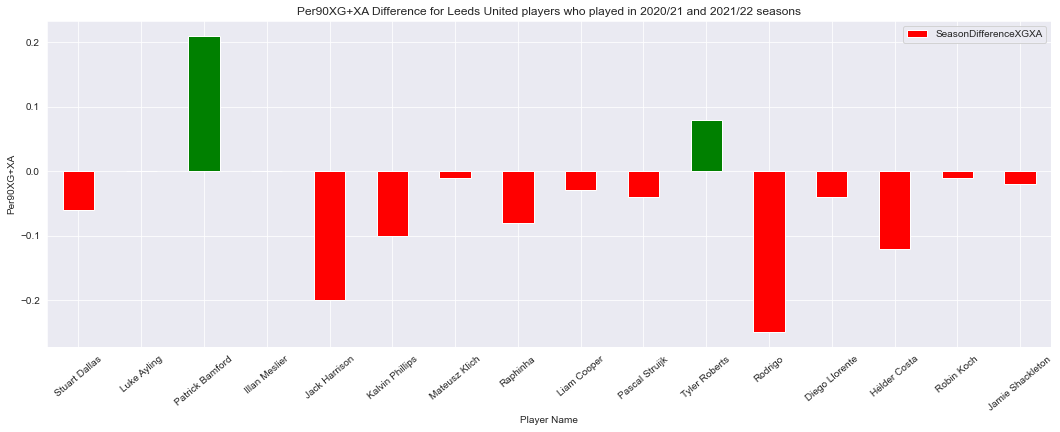

In [31]:
result.plot.bar(x = 'Name', y = 'SeasonDifferenceXGXA', rot = 40, figsize=(18, 6),
                title = 'Per90XG+XA Difference for Leeds United players who played in 2020/21 and 2021/22 seasons',
                ylabel = 'Per90XG+XA', xlabel = 'Player Name',
                color=(result['SeasonDifferenceXGXA'] > 0).map({True: 'g', False: 'r'}))

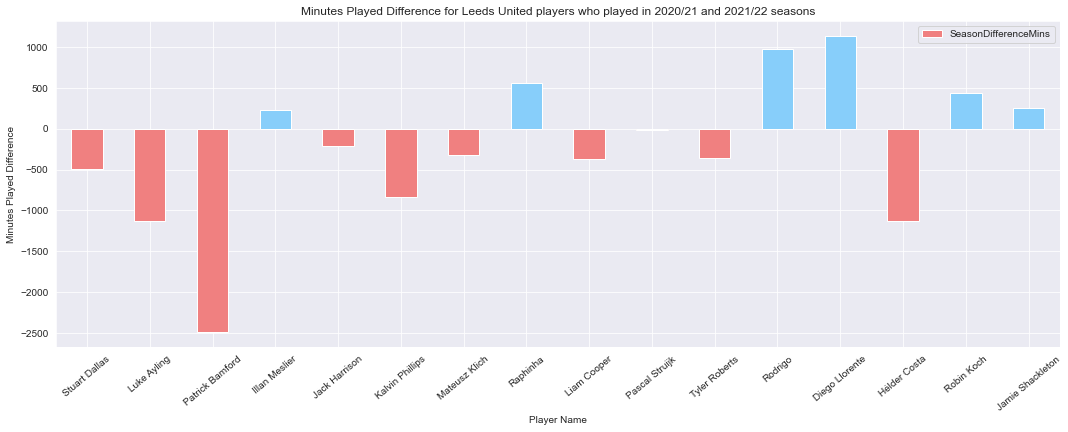

In [34]:
result.plot.bar(x = 'Name', y = "SeasonDifferenceMins", rot = 40, figsize = (18, 6),
                title = 'Minutes Played Difference for Leeds United players who played in 2020/21 and 2021/22 seasons',
                ylabel = 'Minutes Played Difference', xlabel = 'Player Name',
                color = (result['SeasonDifferenceMins'] > 0).map({True: 'lightskyblue', False: 'lightcoral'}))
fig.patch.set_facecolor('white')

### Goalkeeper Analysis

While an unglamorous position, having a good goalkeeper, particularly if a team is at the wrong end of the table can save them multiple points. Leeds United had an undisputed first choice goalkeeper in these two seasons in Illan Meslier. An unusually young keeper in the premier league, he has attracted a lot of plaudits since Leeds won promotion in 2020. Here we will see if his numbers were actually saving Leeds points or not.